#### k-Nearest Neighbor (kNN) Classification:

#### <u> Business Problem: </u> 
```Python
Business Problem Formulation:

Predicting the Rating Category of a Service based on user interactions, service ratings, and engagement metrics can help businesses optimize their offerings and enhance user experience. This can lead to better customer satisfaction, increased revenue, and improved brand loyalty. In a professional services or educational platform, where user satisfaction is crucial, understanding the factors contributing to perceived service quality can help tailor offerings and enhance user experience. The business goal is to predict the 'Rating Category' of a service (High, Medium, Low) based on user interactions, service ratings, and engagement metrics.
```

#### <u> Dataset Description: </u>

##### This dataset contains information on user interactions with various services offered by a company, ServiceSight. The dataset is intended for building a recommendation system to suggest relevant services to users based on their historical interactions, roles, departments, and experience levels.
```Python
Columns:
--------
 - User ID: Unique identifier for each user. 
 - Role: The professional role of the user (e.g., Data Scientist, Analyst).
 - Department: The department to which the user belongs (e.g., Engineering, Marketing).
 - Experience Level: Level of experience of the user (e.g., Beginner, Advanced).
 - Service Name: Name of the service with which the user interacted.
 - Interaction Type: Type of interaction performed by the user (e.g., completed tutorial, added to favorite, viewed, subscribed).
 - Interaction Count: Number of times the user has interacted with the service.
 - Service Rating: User's rating for the service on a scale of 1 to 5.
 - Timestamp: The time of day when the interaction occurred.
 - Relevance: A binary label indicating if a service is relevant (1 for "High" rating) or not (0 otherwise) 
              based on user satisfaction, signaling high user interest  or satisfaction with the service.
 - Total Interaction Count: Total interactions per user, showing engagement level.
 - Total Favorite Count: Counts user favorites, reflecting strong preferences.
 - Rating Category: Categorizes Service Rating into three levels: 
                        - High: Strong positive user rating. 
                        - Medium: Moderate user satisfaction. 
                        - Low: Low satisfaction with the service.
                        (Target Variable)

--------------------
Potential Use Cases: 

Personalized Recommendations: Predicting ratings helps recommend services likely to meet user needs, enhancing satisfaction.
Proactive Support: Flagging users likely to rate poorly enables early support, improving their experience.
Service Optimization: Low-rated services can be identified for improvement, maintaining quality across offerings.
Retention Analysis: Users who frequently rate poorly can be targeted with retention strategies to prevent churn.
Targeted Marketing: High-rated services can be promoted in marketing, attracting similar users.
Benchmarking: Monitoring predicted ratings helps benchmark against competitors and drive strategic adjustments.
Resource Allocation: Resources can be allocated to improve low-rated services, optimizing development efforts.
Engagement Reporting: Predicted ratings give insights across roles and departments, aiding decision-makers in identifying satisfaction trends.
```

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import KNNBasic
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


ModuleNotFoundError: No module named 'surprise'

In [2]:
# Load dataset
data = pd.read_csv('recommendation_dataset.csv')

# Display the first few rows
data.head(3)

User ID              Role   Department Experience Level  Service Name  \
0   U0197       ML Engineer      Product         Beginner    Service 16   
1   U0411      Data Analyst  Engineering         Beginner     Service 1   
2   U0271  Business Analyst      Product           Expert   Service 100   

     Interaction Type  Interaction Count  Service Rating  Relevance  \
0  completed tutorial                  9        4.946389          1   
1   added to favorite                  2        1.000000          0   
2              viewed                  1        1.000000          0   

   Total Favorite Count Rating Category  
0                    10            High  
1                    18             Low  
2                    15             Low

In [3]:
# Basic info on the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   User ID               45000 non-null  object 
 1   Role                  45000 non-null  object 
 2   Department            45000 non-null  object 
 3   Experience Level      45000 non-null  object 
 4   Service Name          45000 non-null  object 
 5   Interaction Type      45000 non-null  object 
 6   Interaction Count     45000 non-null  int64  
 7   Service Rating        45000 non-null  float64
 8   Relevance             45000 non-null  int64  
 9   Total Favorite Count  45000 non-null  int64  
 10  Rating Category       45000 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 3.8+ MB


In [4]:
data = data.drop(['User ID'], axis=1)
data.head(2)

Role   Department Experience Level Service Name  \
0   ML Engineer      Product         Beginner   Service 16   
1  Data Analyst  Engineering         Beginner    Service 1   

     Interaction Type  Interaction Count  Service Rating  Relevance  \
0  completed tutorial                  9        4.946389          1   
1   added to favorite                  2        1.000000          0   

   Total Favorite Count Rating Category  
0                    10            High  
1                    18             Low

In [5]:
# Data imputation
# Separate categorical and numeric columns
categorical_columns = data.select_dtypes(include=['object']).columns
numeric_columns = data.select_dtypes(include=['number']).columns

# Impute missing values: numeric columns with median, categorical columns with mode
for column in numeric_columns:
    data[column].fillna(data[column].median(), inplace=True)

for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Display the dataset after imputation
data.head(3)

Role   Department Experience Level  Service Name  \
0       ML Engineer      Product         Beginner    Service 16   
1      Data Analyst  Engineering         Beginner     Service 1   
2  Business Analyst      Product           Expert   Service 100   

     Interaction Type  Interaction Count  Service Rating  Relevance  \
0  completed tutorial                  9        4.946389          1   
1   added to favorite                  2        1.000000          0   
2              viewed                  1        1.000000          0   

   Total Favorite Count Rating Category  
0                    10            High  
1                    18             Low  
2                    15             Low

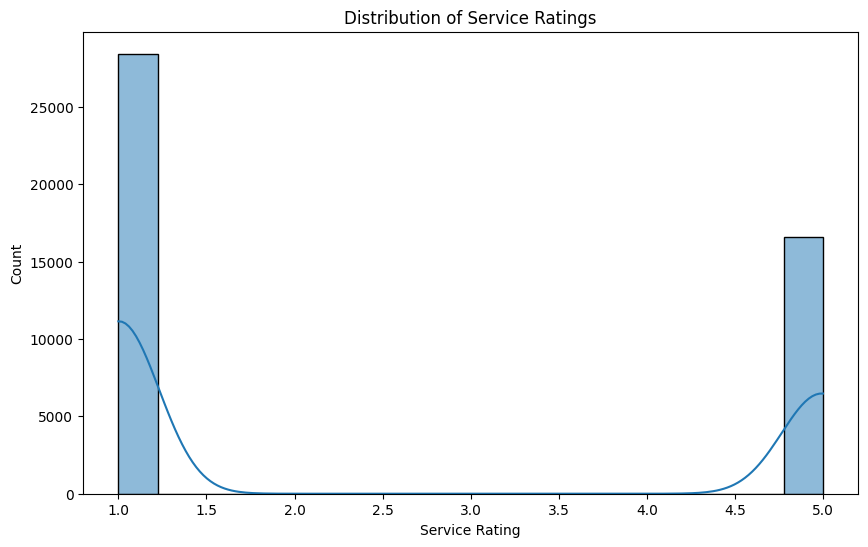

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Service Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Service Rating'], kde=True)
plt.title('Distribution of Service Ratings')
plt.show()

In [7]:
# Boxplot using plotly
# Map the integer values back to their categorical string names
# Create the interactive boxplot using Plotly
fig = px.box(data, x='Rating Category', y='Interaction Count', title='Interaction Count by Rating Category')
# Show the interactive plot
fig.show()

In [8]:
# Normalize the numeric variables
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

data.head(3)

Role   Department Experience Level  Service Name  \
0       ML Engineer      Product         Beginner    Service 16   
1      Data Analyst  Engineering         Beginner     Service 1   
2  Business Analyst      Product           Expert   Service 100   

     Interaction Type  Interaction Count  Service Rating  Relevance  \
0  completed tutorial           0.888889        0.986597        1.0   
1   added to favorite           0.111111        0.000000        0.0   
2              viewed           0.000000        0.000000        0.0   

   Total Favorite Count Rating Category  
0              0.368421            High  
1              0.789474             Low  
2              0.631579             Low

In [9]:
# Applying label encoding to the 'Rating Category' target variable
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'Rating Category' column
data['Rating Category'] = label_encoder.fit_transform(data['Rating Category'])

# Display the transformed target variable
data['Rating Category'].head(3), label_encoder.classes_  # Displaying first few entries and the class mappings
data.head(2)

Role   Department Experience Level Service Name  \
0   ML Engineer      Product         Beginner   Service 16   
1  Data Analyst  Engineering         Beginner    Service 1   

     Interaction Type  Interaction Count  Service Rating  Relevance  \
0  completed tutorial           0.888889        0.986597        1.0   
1   added to favorite           0.111111        0.000000        0.0   

   Total Favorite Count  Rating Category  
0              0.368421                0  
1              0.789474                1

In [10]:
# output the rating category integer to category mapping table
# Display the transformed target variable and the class mappings
# Create a DataFrame for the mapping
mapping_df = pd.DataFrame({
    'Encoded Value': range(len(label_encoder.classes_)),
    'Original Category': label_encoder.classes_
})

# Display the mapping DataFrame
mapping_df

Encoded Value Original Category
0              0              High
1              1               Low
2              2            Medium

In [11]:
# One-hot encode categorical columns 
datan = data.drop(['Rating Category'], axis=1)
datan = pd.get_dummies(data, columns=['Role','Department','Experience Level','Service Name','Interaction Type'], drop_first=True)
# Add the 'Rating Category' column back to the DataFrame
datan['Rating Category'] = data['Rating Category']
# Display the dataset after encoding
datan.head(3)

Interaction Count  Service Rating  Relevance  Total Favorite Count  \
0           0.888889        0.986597        1.0              0.368421   
1           0.111111        0.000000        0.0              0.789474   
2           0.000000        0.000000        0.0              0.631579   

   Rating Category  Role_Cloud Architect  Role_Data Analyst  \
0                0                 False              False   
1                1                 False               True   
2                1                 False              False   

   Role_Data Scientist  Role_ML Engineer  Department_Marketing  ...  \
0                False              True                 False  ...   
1                False             False                 False  ...   
2                False             False                 False  ...   

   Service Name_ Service 93  Service Name_ Service 94  \
0                     False                     False   
1                     False                     False   
2                     False                     False   

   Service Name_ Service 95  Service Name_ Service 96  \
0                     False                     False   
1                     False                     False   
2                     False                     False   

   Service Name_ Service 97  Service Name_ Service 98  \
0                     False                     False   
1                     False                     False   
2                     False                     False   

   Service Name_ Service 99  Interaction Type_completed tutorial  \
0                     False                                 True   
1                     False                                False   
2                     False                                False   

   Interaction Type_subscribed  Interaction Type_viewed  
0                        False                    False  
1                        False                    False  
2                        False                     True  

[3 rows x 118 columns]

In [12]:
# Partitioning of the data into train and test
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, cohen_kappa_score

# Preprocessing
le = LabelEncoder()
datan['Rating Category'] = le.fit_transform(datan['Rating Category'])

X = datan.drop(columns=['Rating Category'])
y = datan['Rating Category']

In [13]:
datan.head(2)

Interaction Count  Service Rating  Relevance  Total Favorite Count  \
0           0.888889        0.986597        1.0              0.368421   
1           0.111111        0.000000        0.0              0.789474   

   Rating Category  Role_Cloud Architect  Role_Data Analyst  \
0                0                 False              False   
1                1                 False               True   

   Role_Data Scientist  Role_ML Engineer  Department_Marketing  ...  \
0                False              True                 False  ...   
1                False             False                 False  ...   

   Service Name_ Service 93  Service Name_ Service 94  \
0                     False                     False   
1                     False                     False   

   Service Name_ Service 95  Service Name_ Service 96  \
0                     False                     False   
1                     False                     False   

   Service Name_ Service 97  Service Name_ Service 98  \
0                     False                     False   
1                     False                     False   

   Service Name_ Service 99  Interaction Type_completed tutorial  \
0                     False                                 True   
1                     False                                False   

   Interaction Type_subscribed  Interaction Type_viewed  
0                        False                    False  
1                        False                    False  

[2 rows x 118 columns]

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40500, 117), (4500, 117), (40500,), (4500,))

In [15]:
X_train.head(2)

Interaction Count  Service Rating  Relevance  Total Favorite Count  \
23647           0.000000             0.0        0.0              0.473684   
31175           0.888889             1.0        1.0              0.315789   

       Role_Cloud Architect  Role_Data Analyst  Role_Data Scientist  \
23647                  True              False                False   
31175                 False              False                False   

       Role_ML Engineer  Department_Marketing  Department_Product  ...  \
23647             False                 False               False  ...   
31175              True                  True               False  ...   

       Service Name_ Service 93  Service Name_ Service 94  \
23647                     False                     False   
31175                     False                     False   

       Service Name_ Service 95  Service Name_ Service 96  \
23647                     False                     False   
31175                     False                     False   

       Service Name_ Service 97  Service Name_ Service 98  \
23647                     False                     False   
31175                     False                     False   

       Service Name_ Service 99  Interaction Type_completed tutorial  \
23647                     False                                False   
31175                     False                                False   

       Interaction Type_subscribed  Interaction Type_viewed  
23647                         True                    False  
31175                         True                    False  

[2 rows x 117 columns]

In [16]:
X_test.head(2)

Interaction Count  Service Rating  Relevance  Total Favorite Count  \
37979                1.0             1.0        1.0              0.473684   
9911                 1.0             1.0        1.0              0.368421   

       Role_Cloud Architect  Role_Data Analyst  Role_Data Scientist  \
37979                 False              False                False   
9911                  False              False                False   

       Role_ML Engineer  Department_Marketing  Department_Product  ...  \
37979             False                 False               False  ...   
9911              False                 False                True  ...   

       Service Name_ Service 93  Service Name_ Service 94  \
37979                     False                     False   
9911                      False                     False   

       Service Name_ Service 95  Service Name_ Service 96  \
37979                     False                     False   
9911                      False                     False   

       Service Name_ Service 97  Service Name_ Service 98  \
37979                     False                     False   
9911                      False                     False   

       Service Name_ Service 99  Interaction Type_completed tutorial  \
37979                     False                                False   
9911                      False                                False   

       Interaction Type_subscribed  Interaction Type_viewed  
37979                        False                     True  
9911                          True                    False  

[2 rows x 117 columns]

In [17]:
# Apply feature selection to select a subset of features
# Using Recursive Feature Elimination: RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Initialize the optimal estimator (Random Forest Classifier in this case)
optimal_estimator = RandomForestClassifier(random_state=42)

# Specify the number of features to select
num_features_to_select = 20  # Adjust this number based on your requirement

# Perform RFE with the optimal estimator
rfe = RFE(estimator=optimal_estimator, n_features_to_select=num_features_to_select)
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Transform the dataset to only include selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

In [18]:
X_train_rfe.shape

(40500, 20)

#### KNN Classifier Training, Hyperparameter Tuning, and Testing

In [19]:
# Hyperparameter tuning for KNN
param_grid = {'n_neighbors': range(1, 21), 'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_rfe, y_train)
best_knn = grid_search.best_estimator_
# Optimal k based on gridsearch
best_k = grid_search.best_params_['n_neighbors']

# Model prediction and evaluation
y_pred = best_knn.predict(X_test_rfe)
y_pred_proba = best_knn.predict_proba(X_test_rfe)

print(f"The optimal value of k: {best_k}")
# Classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba, multi_class='ovr'))
print("Cohen Kappa Score:", cohen_kappa_score(y_test, y_pred))


The optimal value of k: 15
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1670
           1       0.52      0.55      0.53      1379
           2       0.54      0.51      0.53      1451

    accuracy                           0.70      4500
   macro avg       0.69      0.69      0.69      4500
weighted avg       0.71      0.70      0.70      4500

ROC AUC Score: 0.8521713809019759
Cohen Kappa Score: 0.555385980684808


In [ ]:
# Generate ROC plots 

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Assuming `num_classes` is the number of unique classes in `y_test`
# Binarize the output for multi-class OvR ROC calculation
# Define the number of classes based on the unique values in y_test
num_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=range(num_classes))

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Compute macro-average ROC curve and ROC area
# Aggregate all false positive rates
all_fpr = np.unique(np.concatenate([roc_curve(y_test_bin[:, i], y_pred_proba[:, i])[0] for i in range(num_classes)]))

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    mean_tpr += np.interp(all_fpr, fpr, tpr)

# Average it and compute AUC
mean_tpr /= num_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

# Plot ROC curves for each class and the macro/micro-averages
plt.figure(figsize=(10, 8))

# Individual class ROC curves
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc(fpr, tpr):.2f})')

# Plot the micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average ROC (AUC = {roc_auc_micro:.2f})', linestyle='dashdot', linewidth=4)

# Plot the macro-average ROC curve
plt.plot(all_fpr, mean_tpr, label=f'Macro-average ROC (AUC = {roc_auc_macro:.2f})', linestyle='-', linewidth=4)

# Diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN with Overall ROC')

# Adding grid with minor and major ticks
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()

# Legend
plt.legend(loc='best')
plt.show()

